In [4]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 2.8 MB/s eta 0:00:00a 0:00:01
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import re as re
from collections import Counter
%matplotlib inline
# rc = {
#     "axes.facecolor": "white",
#     "figure.facecolor": "white",
#     "axes.edgecolor": "#000000",
#     "grid.color": "white",
#     "font.family": "serif",
#     "axes.labelcolor": "#000000",
#     "xtick.color": "#000000",
#     "ytick.color": "#000000",
#     "grid.alpha": 0.4
# }

rc = {
    "axes.facecolor": "white",
    "figure.facecolor": "white",
    "axes.edgecolor": "#c0c0c0",
    "grid.color": "#c0c0c0",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

In [48]:
df = pd.read_csv('long_covid0903.csv', encoding= 'unicode_escape')

In [75]:
def plot_count(df: pd.core.frame.DataFrame, col_list: list, title_name: str='Train') -> None:
    """Draws the pie and count plots for categorical variables.
    
    Args:
        df: train or test dataframes
        col_list: a list of the selected categorical variables.
        title_name: 'Train' or 'Test' (default 'Train')
        
    Returns:
        subplots of size (len(col_list), 2)
    """
    f, ax = plt.subplots(len(col_list), 2, figsize=(10, 4))
    plt.subplots_adjust(wspace=0)
    
    s1 = df[col_list].value_counts().loc[[0,1],:]
    N = len(s1)

    outer_sizes = s1
    inner_sizes = s1/N

    outer_colors = ['#9E3F00', '#eb5e00', '#ff781f', '#ff9752', '#ff9752']
    inner_colors = ['#ff6905', '#ff8838', '#ffa66b']

    ax[0].pie(
        outer_sizes,colors=outer_colors, 
        labels=s1.index.tolist(), 
        startangle=90,frame=True, radius=1.3, 
        explode=([0.05]*(N-1) + [.3]),
        wedgeprops={ 'linewidth' : 1, 'edgecolor' : 'white'}, 
        textprops={'fontsize': 12, 'weight': 'bold'}
    )

    textprops = {
        'size':13, 
        'weight': 'bold', 
        'color':'white'
    }

    ax[0].pie(
        inner_sizes, colors=inner_colors,
        radius=1, startangle=90,
        autopct='%1.f%%',explode=([.1]*(N-1) + [.3]),
        pctdistance=0.8, textprops=textprops
    )

    center_circle = plt.Circle((0,0), .68, color='black', 
                               fc='white', linewidth=0)
    ax[0].add_artist(center_circle)

    x = s1
    y = [0,1]
    sns.barplot(
        x=x, y=y, ax=ax[1],
        palette='YlOrBr_r', orient='horizontal'
    )

    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].tick_params(
        axis='x',         
        which='both',      
        bottom=False,      
        labelbottom=False
    )

    for i, v in enumerate(s1):
        ax[1].text(v, i+0.1, str(v), color='black', 
                     fontweight='bold', fontsize=12)

#     plt.title(col_list)
    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel('count', fontweight="bold", color='black')
    ax[1].set_ylabel('label', fontweight="bold", color='black')

    f.suptitle(f'{title_name} Dataset', fontsize=20, fontweight='bold')
    plt.tight_layout()    
    plt.show()

#reference: https://www.kaggle.com/code/sergiosaharovskiy/ps-s3e7-2023-eda-and-submission

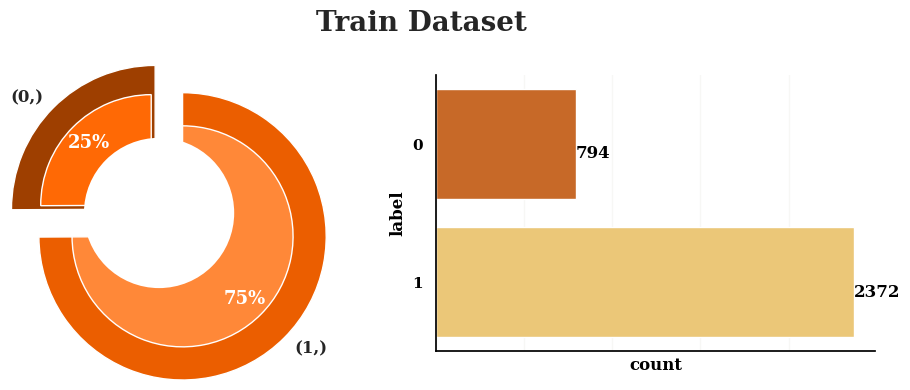

In [76]:
plot_count(df, ['label'])

In [4]:
# 關鍵字列表
keywords = ['chronic', 'long covid', 'long-covid', 'longcovid', 'long-term', 'persistent', 'after-effects', 'sequelae',
            'complications', 'recovery', 'post covid', 'post-covid', 'omicron', 'subvariant', 'reinfection', 'immune', 'variant']

keyword_counts = {keyword: df['tweet'].str.lower().apply(lambda x: keyword in x).sum() for keyword in keywords}

print(keyword_counts)

{'chronic': 189, 'long covid': 53, 'long-covid': 0, 'longcovid': 0, 'long-term': 175, 'persistent': 43, 'after-effects': 6, 'sequelae': 2, 'complications': 201, 'recovery': 400, 'post covid': 33, 'post-covid': 8, 'omicron': 99, 'subvariant': 0, 'reinfection': 55, 'immune': 1691, 'variant': 291}


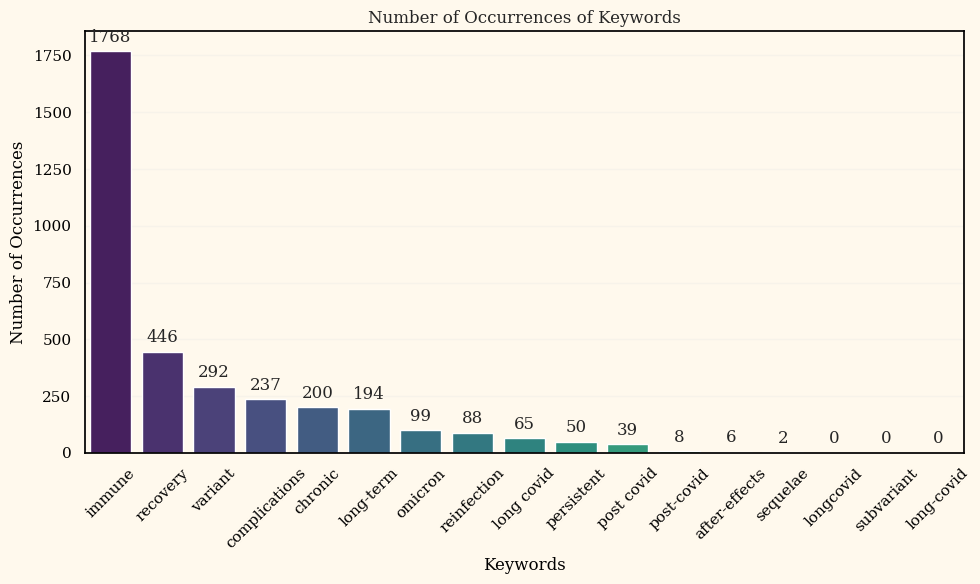

In [10]:
# 轉換 keyword_counts 成 DataFrame 以方便繪圖
df_keyword_counts = pd.DataFrame(list(keyword_counts.items()), columns=['Keyword', 'Count'])

# 進行排序，這樣圖形會更有意義
df_keyword_counts = df_keyword_counts.sort_values(by='Count', ascending=False)

# 使用 seaborn 的 barplot 方法來繪製柱狀圖
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Keyword', y='Count', data=df_keyword_counts, palette='viridis')

# 在每個柱子上添加數字
for p in ax.patches:
    height = p.get_height()
    # 如果高度不是NaN，則添加註釋
    if not pd.isna(height):
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# 設定標題和軸的名稱
plt.title('Number of Occurrences of Keywords')
plt.xlabel('Keywords')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()

# 顯示圖形
plt.show()
# sns.barplot(
#         keyword_counts.item, ax=ax[1],
#         palette='YlOrBr_r', orient='horizontal'
# )

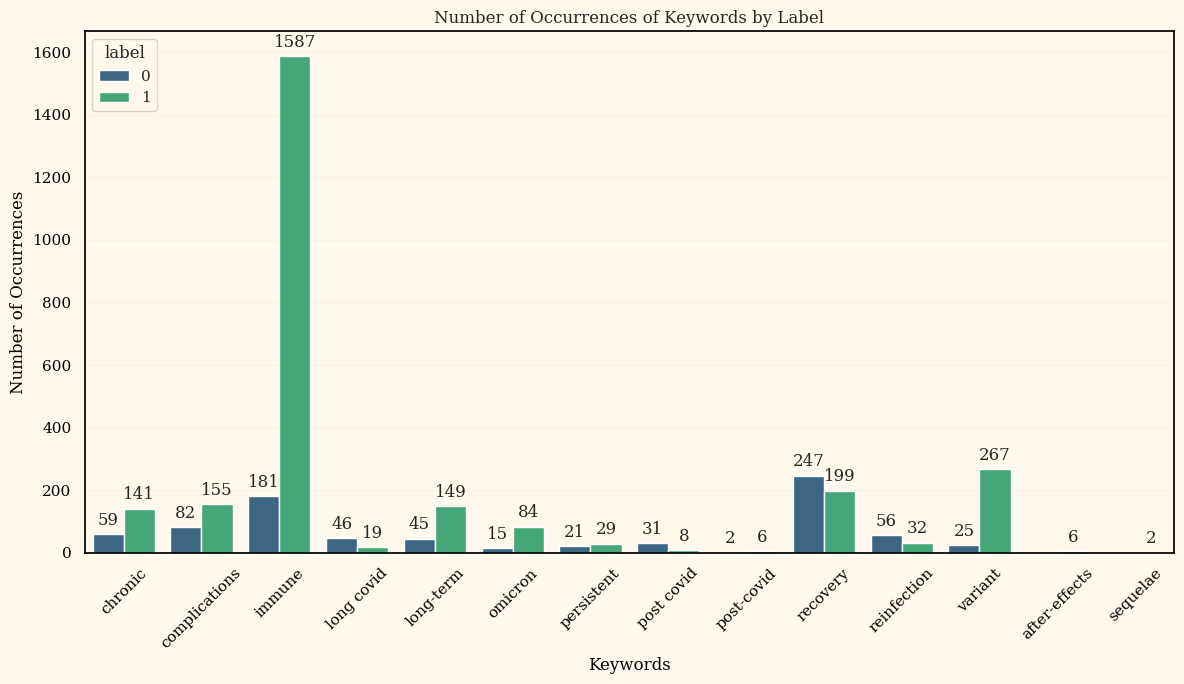

In [11]:
# 定義一個函數，該函數會返回是否含有某個keyword
def contains_keyword(tweet, keyword):
    return keyword in tweet

# 對每個keyword生成一個新的列，該列會表示tweet是否包含該keyword
for keyword in keywords:
    df[keyword] = df['tweet'].str.lower().apply(lambda x: contains_keyword(x, keyword))

# 對每個keyword，計算與每個label的組合出現的次數
melted_df = df.melt(id_vars='label', value_vars=keywords)
grouped_counts = melted_df[melted_df['value'] == True].groupby(['label', 'variable']).size().reset_index(name='count')

# 使用 seaborn 的 barplot 方法來繪製分組柱狀圖
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='variable', y='count', hue='label', data=grouped_counts, palette='viridis')

# 在每個柱子上添加數字
for p in ax.patches:
    height = p.get_height()
    # 如果高度不是NaN，則添加註釋
    if not pd.isna(height):
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# 設定標題和軸的名稱
plt.title('Number of Occurrences of Keywords by Label')
plt.xlabel('Keywords')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()

# 顯示圖形
plt.show()

# Check duplicated data

In [10]:
# 無重複的資料總數
duplicates = df[df['tweet'].duplicated(keep='first') == False]

print(duplicates)

                                                  tweet  label source
0     Reinfection with the virus that causes COVID-1...      0    CDC
1     Reinfections are most often mild, but severe i...      0    CDC
2     If you are reinfected, you can also spread the...      0    CDC
3     Staying up to date with COVID-19 vaccine and t...      0    CDC
4     Once you have had COVID-19, your immune system...      0    CDC
...                                                 ...    ...    ...
3161  @SanjitaPanigra2 @drdeepak81 @biswa4evr @being...      1    NaN
3162  #IndiaFightsCorona: 12 States/UTs have reporte...      0    NaN
3163  Focus on good nutrition as a part of self-care...      0    NaN
3164  #IndiaFightsCorona #CoronaVirusUpdate High rec...      0    NaN
3165  Pinal County Arizona: "Recovery will take time...      0    NaN

[2927 rows x 3 columns]


In [19]:
duplicates

,tweet,label,source
0,Reinfection with the virus that causes COVID-1...,0,CDC
1,"Reinfections are most often mild, but severe i...",0,CDC
2,"If you are reinfected, you can also spread the...",0,CDC
3,Staying up to date with COVID-19 vaccine and t...,0,CDC
4,"Once you have had COVID-19, your immune system...",0,CDC
...,...,...,...
3161,@SanjitaPanigra2 @drdeepak81 @biswa4evr @being...,1,NaN
3162,#IndiaFightsCorona: 12 States/UTs have reporte...,0,NaN
3163,Focus on good nutrition as a part of self-care...,0,NaN
3164,#IndiaFightsCorona #CoronaVirusUpdate High rec...,0,NaN


In [13]:
sum(duplicates.label.values)

2361

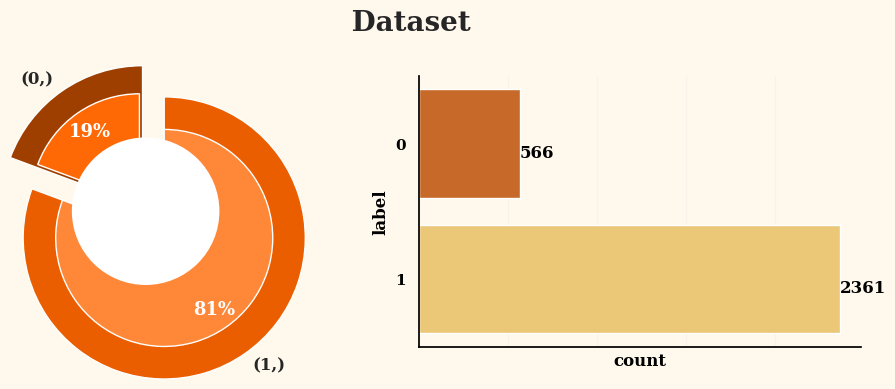

In [93]:
plot_count(duplicates, ['label'], '')

In [35]:
duplicates.to_csv('long_covid1003_unique.csv', index = False)

In [72]:
# 檢查重複的資料總數
dup1 = df[df['tweet'].duplicated(keep=False)]

print(dup1)

                                                  tweet  label source
61      covid usa unofficial update cases up recover...      0    NaN
95      older adults amp people with a severe chroni...      0    NaN
162     older adults amp people with a severe chroni...      0    NaN
174     and are trying to identify what people with ...      0    NaN
209     older adults amp people with a severe chroni...      0    NaN
...                                                 ...    ...    ...
2841  COVID-19 Science Update released: October 9:ev...      0    NaN
2842  Preventing COVID-19 Outbreaks in Long-term Car...      0    NaN
2843  People Who Live in a Nursing Home or Long-Term...      0    NaN
2844  Hydroxychloroquine and Chloroquine Prescribing...      0    NaN
2845  Says Dan Forest has âmissed almost half of t...      0    NaN

[333 rows x 3 columns]


In [ ]:
# 檢查重複的資料細節
dup = df[df['tweet'].duplicated(keep=False)]

grouped = dup.groupby('tweet')

for name, group in grouped:
    if len(group) > 1:  # 檢查是否有多於一筆的重複資料
        print(group)

In [76]:
# 包含特定關鍵字的統計數量
keywords = ['chronic', 'long covid', 'long-covid', 'longcovid', 'long-term', 'persistent', 'after-effects', 'sequelae',
            'complications', 'recovery', 'post covid', 'post-covid', 'omicron', 'subvariant', 'reinfection', 'immune', 'variant']

for keyword in keywords:
    count = duplicates[duplicates['tweet'].str.contains(keyword, case=False)].shape[0]
    print(f"'{keyword}' appears in {count} articles")

'chronic' appears in 189 articles
'long covid' appears in 53 articles
'long-covid' appears in 0 articles
'longcovid' appears in 0 articles
'long-term' appears in 175 articles
'persistent' appears in 43 articles
'after-effects' appears in 6 articles
'sequelae' appears in 2 articles
'complications' appears in 201 articles
'recovery' appears in 400 articles
'post covid' appears in 33 articles
'post-covid' appears in 8 articles
'omicron' appears in 99 articles
'subvariant' appears in 0 articles
'reinfection' appears in 55 articles
'immune' appears in 1691 articles
'variant' appears in 291 articles


{'chronic': 189, 'long covid': 53, 'long-term': 175, 'persistent': 43, 'after-effects': 6, 'sequelae': 2, 'complications': 201, 'recovery': 400, 'post covid': 33, 'post-covid': 8, 'omicron': 99, 'reinfection': 55, 'immune': 1691, 'variant': 291}


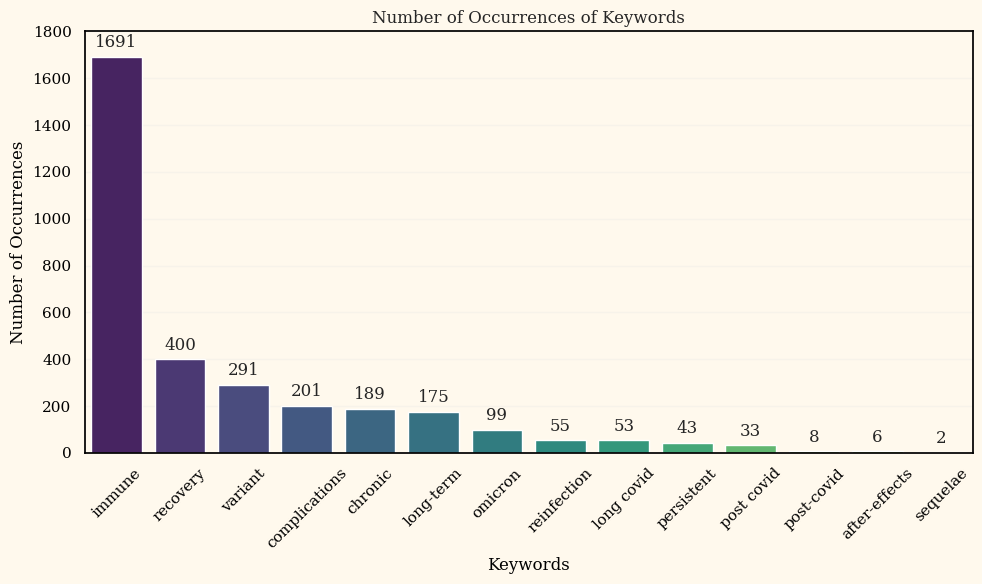

In [94]:
# 關鍵字列表
# keywords = ['chronic', 'long covid', 'long-covid', 'longcovid', 'long-term', 'persistent', 'after-effects', 'sequelae',
#             'complications', 'recovery', 'post covid', 'post-covid', 'omicron', 'subvariant', 'reinfection', 'immune', 'variant']
keywords = ['chronic', 'long covid', 'long-term', 'persistent', 'after-effects', 'sequelae',
            'complications', 'recovery', 'post covid', 'post-covid', 'omicron', 'reinfection', 'immune', 'variant']

keyword_counts = {keyword: duplicates['tweet'].str.lower().apply(lambda x: keyword in x).sum() for keyword in keywords}

print(keyword_counts)

# 轉換 keyword_counts 成 DataFrame 以方便繪圖
df_keyword_counts = pd.DataFrame(list(keyword_counts.items()), columns=['Keyword', 'Count'])

# 進行排序，這樣圖形會更有意義
df_keyword_counts = df_keyword_counts.sort_values(by='Count', ascending=False)

# 使用 seaborn 的 barplot 方法來繪製柱狀圖
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Keyword', y='Count', data=df_keyword_counts, palette='viridis')

# 在每個柱子上添加數字
for p in ax.patches:
    height = p.get_height()
    # 如果高度不是NaN，則添加註釋
    if not pd.isna(height):
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# 設定標題和軸的名稱
plt.title('Number of Occurrences of Keywords')
plt.xlabel('Keywords')
plt.ylabel('Number of Occurrences')
plt.ylim(0,1800)
plt.xticks(rotation=45)
plt.tight_layout()

# 顯示圖形
plt.show()
# sns.barplot(
#         keyword_counts.item, ax=ax[1],
#         palette='YlOrBr_r', orient='horizontal'
# )

/tmp/ipykernel_18574/426044837.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates[keyword] = duplicates['tweet'].str.lower().apply(lambda x: contains_keyword(x, keyword))
/tmp/ipykernel_18574/426044837.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates[keyword] = duplicates['tweet'].str.lower().apply(lambda x: contains_keyword(x, keyword))
/tmp/ipykernel_18574/426044837.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

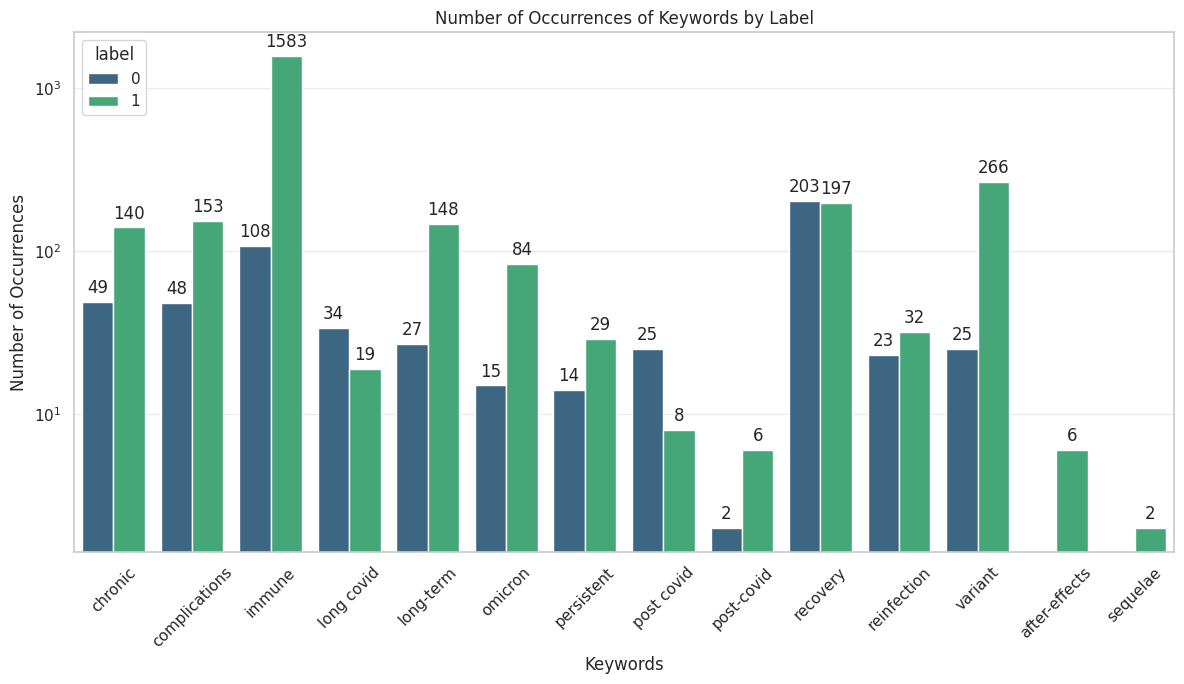

In [100]:
# 定義一個函數，該函數會返回是否含有某個keyword
def contains_keyword(tweet, keyword):
    return keyword in tweet

# 對每個keyword生成一個新的列，該列會表示tweet是否包含該keyword
for keyword in keywords:
    duplicates[keyword] = duplicates['tweet'].str.lower().apply(lambda x: contains_keyword(x, keyword))

# 對每個keyword，計算與每個label的組合出現的次數
melted_df = duplicates.melt(id_vars='label', value_vars=keywords)
grouped_counts = melted_df[melted_df['value'] == True].groupby(['label', 'variable']).size().reset_index(name='count')

# 使用 seaborn 的 barplot 方法來繪製分組柱狀圖
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='variable', y='count', hue='label', data=grouped_counts, palette='viridis')

# 在每個柱子上添加數字
for p in ax.patches:
    height = p.get_height()
    # 如果高度不是NaN，則添加註釋
    if not pd.isna(height):
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# 設定標題和軸的名稱
plt.title('Number of Occurrences of Keywords by Label')
plt.yscale('log') 
plt.xlabel('Keywords')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()

# 顯示圖形
plt.show()

count    2927.000000
mean      288.747865
std       543.833255
min         1.000000
25%        17.000000
50%        31.000000
75%       456.000000
max      6018.000000
Name: text_length, dtype: float64


/tmp/ipykernel_18574/390046349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates['text_length'] = duplicates['tweet'].apply(lambda x: len(x.split()))


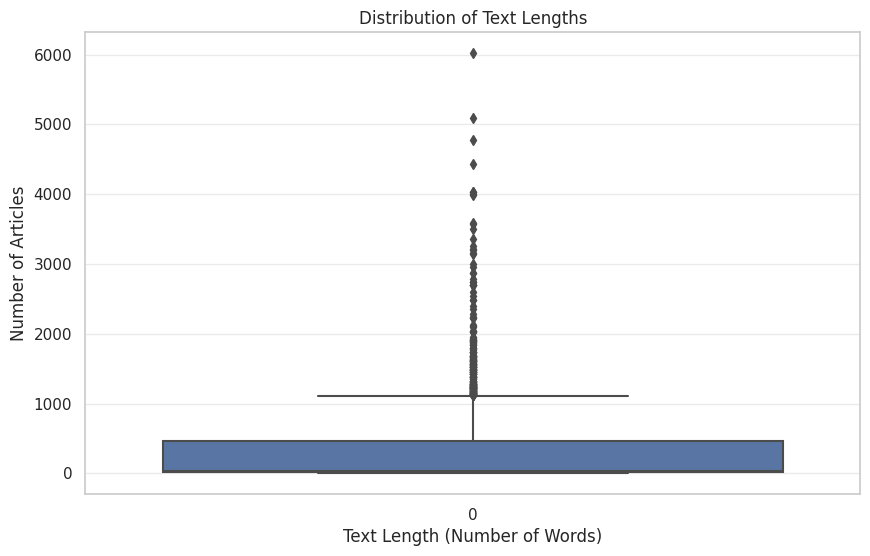

In [99]:
# 計算每篇文章的長度（以字數為單位）
duplicates['text_length'] = duplicates['tweet'].apply(lambda x: len(x.split()))

# 統計文章長度的基本統計資料
length_statistics = duplicates['text_length'].describe()
print(length_statistics)

# 設定圖片風格
sns.set_style("whitegrid")

# 建立直方圖
plt.figure(figsize=(10,6))
sns.boxplot(duplicates['text_length'])
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Number of Articles')
plt.show()


# 按照文本長度統計答對率

In [64]:
df = pd.read_csv('long_covid1003_unique_test_predict.csv')
df

,tweet,label,source,pred,correct,pseudo
0,ofc albos are immune to the virus,1,NaN,1,1,0
1,"No, Pfizer-BioNTech COVID-19 Vaccine Does Not ...",1,NaN,1,1,1
2,"No truth that VAERS system shows 6,000 died be...",1,NaN,1,1,1
3,sinovac says early data show its covid vaccine...,1,NaN,1,1,0
4,Trumps Dubious Claim That Hes Not Contagious:L...,1,NaN,1,1,1
...,...,...,...,...,...,...
288,kele looks like i m immune,1,NaN,1,1,0
289,The Recovery Room: News beyond the pandemic:ho...,0,NaN,0,1,0
290,yeah the tar from smoke if you re burning herb...,1,NaN,1,1,0
291,"No, Drug Manufacturers Do Not Provide Flu Vacc...",1,NaN,1,1,0


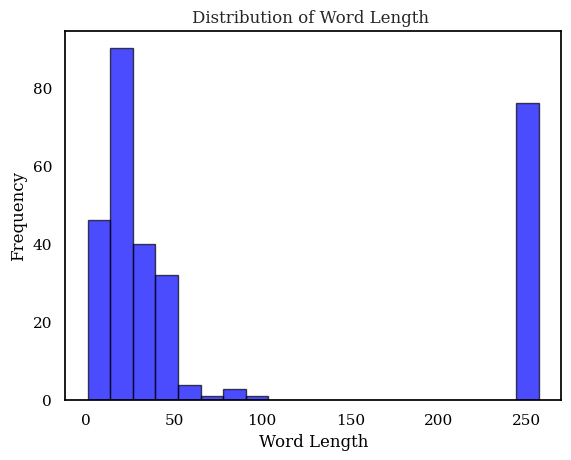

In [51]:
### 畫出test set文本長度分布 
# 使用split函數將推文劃分為單詞，計算每個單詞的長度
df['word_lengths'] = df['tweet'].apply(lambda x: len(x.split()))
# 將超過特定長度的視為一類
df['refined_word_lengths'] = df['word_lengths'].apply(lambda x: 257 if x > 256 else x)
# 繪製平均單詞長度的分布圖
plt.hist(df['refined_word_lengths'], bins=20, alpha=0.7, color='blue', edgecolor='black')

plt.title('Distribution of Word Length ')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()

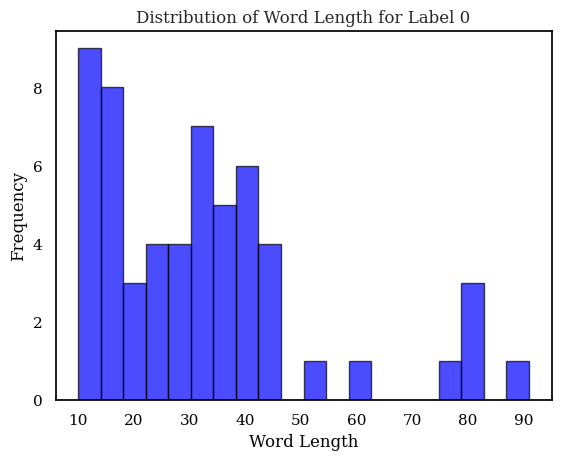

In [52]:
### 畫出Label 0的文本長度分布 
# 使用split函數將推文劃分為單詞，計算每個單詞的長度
df['word_lengths'] = df['tweet'].apply(lambda x: len(x.split()))
# 將超過特定長度的視為一類
df['refined_word_lengths'] = df['word_lengths'].apply(lambda x: 257 if x > 256 else x)
# 繪製平均單詞長度的分布圖
plt.hist(df[df['label']==0]['refined_word_lengths'], bins=20, alpha=0.7, color='blue', edgecolor='black')

plt.title('Distribution of Word Length for Label 0')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()

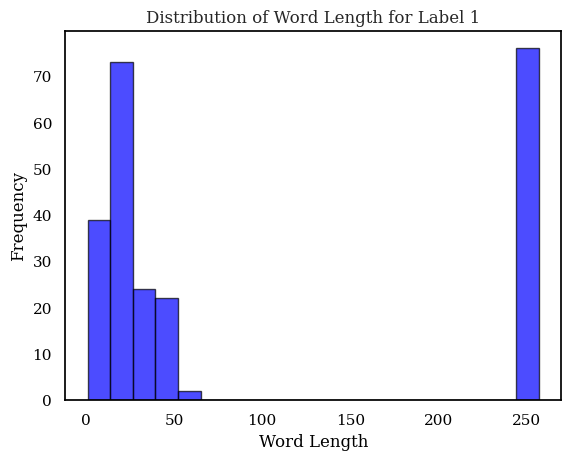

In [53]:
### 畫出Label 1的文本長度分布 
# 使用split函數將推文劃分為單詞，計算每個單詞的長度
df['word_lengths'] = df['tweet'].apply(lambda x: len(x.split()))
# 將超過特定長度的視為一類
df['refined_word_lengths'] = df['word_lengths'].apply(lambda x: 257 if x > 256 else x)
# 繪製平均單詞長度的分布圖
plt.hist(df[df['label']==1]['refined_word_lengths'], bins=20, alpha=0.7, color='blue', edgecolor='black')

plt.title('Distribution of Word Length for Label 1')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()

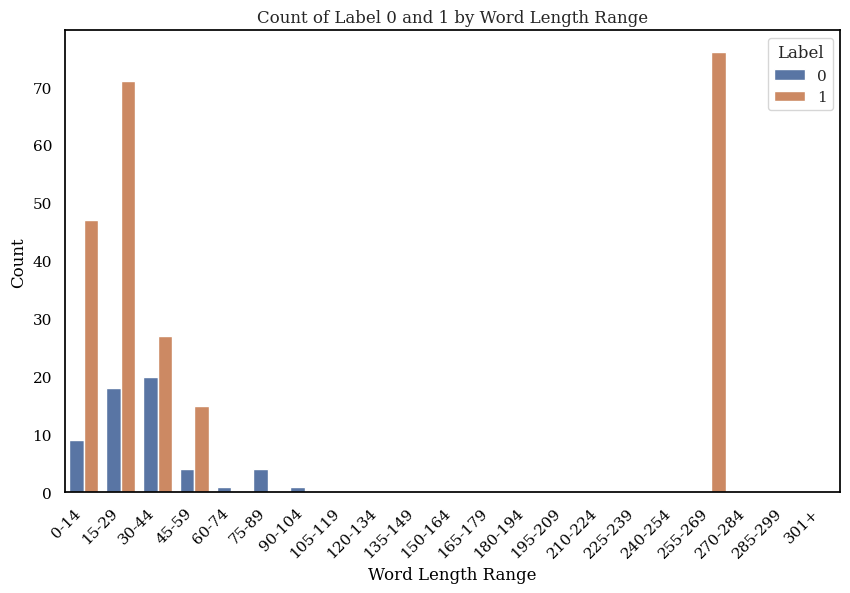

In [55]:
### 按照Label畫出文本長度分布
import seaborn as sns

# 將文本長度分為不同區間
df['length_range'] = pd.cut(df['refined_word_lengths'],
                            bins=[i*15 for i in range(21)] + [float('inf')],
                            labels=[f'{i*15}-{(i+1)*15-1}' for i in range(20)] + ['301+'], right=False)

# 使用seaborn繪製 countplot，顯示0和1的比例
plt.figure(figsize=(10,6))
sns.countplot(x='length_range', hue='label', data=df)
plt.xlabel('Word Length Range')
plt.ylabel('Count')
plt.title('Count of Label 0 and 1 by Word Length Range')
plt.xticks(rotation=45, ha='right')  # 讓 x 軸標籤斜著顯示，避免重疊
plt.legend(title='Label', loc='upper right')
plt.show()


In [56]:
# 按照Label和文本長度範圍計算計數
table = pd.crosstab(df['length_range'], df['label'], margins=True, margins_name='Total')

# 顯示表格
print(table)


label          0    1  Total
length_range                
0-14           9   47     56
15-29         18   71     89
30-44         20   27     47
45-59          4   15     19
60-74          1    0      1
75-89          4    0      4
90-104         1    0      1
255-269        0   76     76
Total         57  236    293


/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:518: RuntimeW

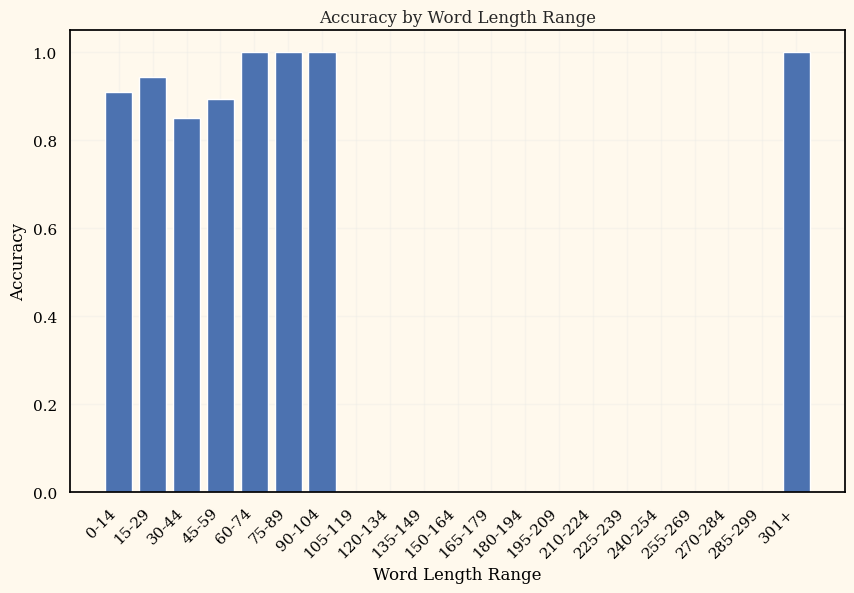

In [23]:
# 不同區間的準確度
# 將文本長度分為不同區間
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
df['length_range'] = pd.cut(df['refined_word_lengths'],
                            bins=[i*15 for i in range(21)] + [float('inf')],
                            labels=[f'{i*15}-{(i+1)*15-1}' for i in range(20)] + ['301+'], right=False)

# 計算每個區間的 accuracy
accuracy_by_range = []

for length_range, group in df.groupby('length_range'):
    # 計算 accuracy
    accuracy = accuracy_score(group['label'], group['pred'])
    
    accuracy_by_range.append({'length_range': length_range, 'accuracy': accuracy})

# 將結果轉換成 DataFrame
result_df = pd.DataFrame(accuracy_by_range)

# 繪製圖表
plt.figure(figsize=(10,6))
plt.bar(result_df['length_range'], result_df['accuracy'])
plt.xlabel('Word Length Range')
plt.ylabel('Accuracy')
plt.title('Accuracy by Word Length Range')
plt.xticks(rotation=45, ha='right')  # 讓 x 軸標籤斜著顯示，避免重疊
plt.show()


In [57]:
# 將文本長度分為不同區間
df['length_range'] = pd.cut(df['refined_word_lengths'],
                            bins=[i*15 for i in range(21)] + [float('inf')],
                            labels=[f'{i*15}-{(i+1)*15-1}' for i in range(20)] + ['301+'], right=False)

# 計算每個區間的 accuracy
accuracy_by_range = []

for length_range, group in df.groupby('length_range'):
    # 計算 accuracy
    accuracy = accuracy_score(group['label'], group['pred'])
    
    accuracy_by_range.append({'length_range': length_range, 'accuracy': accuracy})

# 將結果轉換成 DataFrame
result_df = pd.DataFrame(accuracy_by_range)

# 顯示結果表格
print(result_df)


   length_range  accuracy
0          0-14  0.910714
1         15-29  0.943820
2         30-44  0.851064
3         45-59  0.894737
4         60-74  1.000000
5         75-89  1.000000
6        90-104  1.000000
7       105-119       NaN
8       120-134       NaN
9       135-149       NaN
10      150-164       NaN
11      165-179       NaN
12      180-194       NaN
13      195-209       NaN
14      210-224       NaN
15      225-239       NaN
16      240-254       NaN
17      255-269  1.000000
18      270-284       NaN
19      285-299       NaN
20         301+       NaN


/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:518: RuntimeW

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:518: RuntimeW

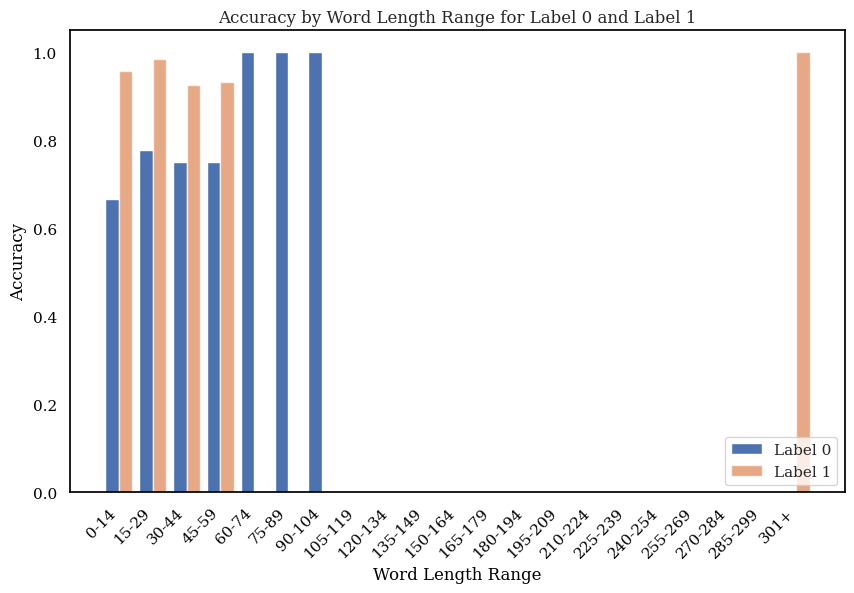

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# 假設你的資料框為df，已經包含了label和pred列
# ...

# 計算每個 label 為 0 的區間準確度
accuracy_by_range_label_0 = []

for length_range, group in df[df['label'] == 0].groupby('length_range'):
    accuracy = accuracy_score(group['label'], group['pred'])
    accuracy_by_range_label_0.append({'length_range': length_range, 'accuracy_label_0': accuracy})

# 將結果轉換成 DataFrame
result_df_label_0 = pd.DataFrame(accuracy_by_range_label_0)

# 計算每個 label 為 1 的區間準確度
accuracy_by_range_label_1 = []

for length_range, group in df[df['label'] == 1].groupby('length_range'):
    accuracy = accuracy_score(group['label'], group['pred'])
    accuracy_by_range_label_1.append({'length_range': length_range, 'accuracy_label_1': accuracy})

# 將結果轉換成 DataFrame
result_df_label_1 = pd.DataFrame(accuracy_by_range_label_1)

# 合併兩個結果 DataFrame，根據 length_range 進行合併
result_df_combined = pd.merge(result_df_label_0, result_df_label_1, on='length_range', how='outer')


x_axis = np.arange(21)

# 繪製圖表
plt.figure(figsize=(10, 6))

# 以不同顏色繪製 label 為 0 和 1 的準確度
plt.bar(x_axis-0.2,  result_df_combined['accuracy_label_0'],  label='Label 0', width = 0.4)
plt.bar(x_axis+0.2,  result_df_combined['accuracy_label_1'],  label='Label 1', alpha=0.7, width = 0.4)
plt.xticks(x_axis, result_df_label_1['length_range'])
plt.xlabel('Word Length Range')
plt.ylabel('Accuracy')
plt.title('Accuracy by Word Length Range for Label 0 and Label 1')
plt.legend(loc='lower right')  # 顯示圖例
plt.xticks(rotation=45, ha='right')
plt.show()


In [59]:
import pandas as pd
from sklearn.metrics import accuracy_score

# 假設你的資料框為df，已經包含了label和pred列
# ...

# 將文本長度分為不同區間
df['length_range'] = pd.cut(df['refined_word_lengths'],
                            bins=[i*15 for i in range(21)] + [float('inf')],
                            labels=[f'{i*15}-{(i+1)*15-1}' for i in range(20)] + ['301+'], right=False)

# 計算每個 label 為 0 的區間準確度
accuracy_by_range_label_0 = []

for length_range, group in df[df['label'] == 0].groupby('length_range'):
    accuracy = accuracy_score(group['label'], group['pred'])
    accuracy_by_range_label_0.append({'length_range': length_range, 'accuracy_label_0': accuracy})

# 將結果轉換成 DataFrame
result_df_label_0 = pd.DataFrame(accuracy_by_range_label_0)

# 計算每個 label 為 1 的區間準確度
accuracy_by_range_label_1 = []

for length_range, group in df[df['label'] == 1].groupby('length_range'):
    accuracy = accuracy_score(group['label'], group['pred'])
    accuracy_by_range_label_1.append({'length_range': length_range, 'accuracy_label_1': accuracy})

# 將結果轉換成 DataFrame
result_df_label_1 = pd.DataFrame(accuracy_by_range_label_1)

# 合併兩個結果 DataFrame，根據 length_range 進行合併
result_df_combined = pd.merge(result_df_label_0, result_df_label_1, on='length_range', how='outer')

# 顯示結果表格
print(result_df_combined)


   length_range  accuracy_label_0  accuracy_label_1
0          0-14          0.666667          0.957447
1         15-29          0.777778          0.985915
2         30-44          0.750000          0.925926
3         45-59          0.750000          0.933333
4         60-74          1.000000               NaN
5         75-89          1.000000               NaN
6        90-104          1.000000               NaN
7       105-119               NaN               NaN
8       120-134               NaN               NaN
9       135-149               NaN               NaN
10      150-164               NaN               NaN
11      165-179               NaN               NaN
12      180-194               NaN               NaN
13      195-209               NaN               NaN
14      210-224               NaN               NaN
15      225-239               NaN               NaN
16      240-254               NaN               NaN
17      255-269               NaN          1.000000
18      270-

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:518: RuntimeW

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:518: RuntimeW

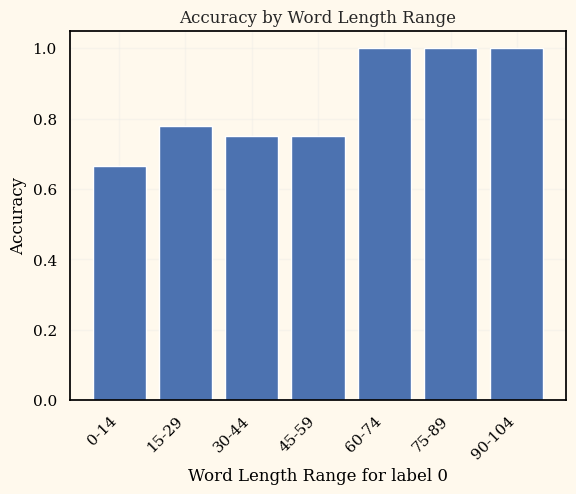

In [11]:
### 不同區間的準確度 Label0
# 將文本長度分為不同區間
df['length_range'] = pd.cut(df['refined_word_lengths'],
                            bins=[i*15 for i in range(21)] + [float('inf')],
                            labels=[f'{i*15}-{(i+1)*15-1}' for i in range(20)] + ['301+'], right=False)

# 計算每個區間的 accuracy
accuracy_by_range = []

for length_range, group in df[df['label']==0].groupby('length_range'):
    # 計算 accuracy
    accuracy = accuracy_score(group['label'], group['pred'])
    
    accuracy_by_range.append({'length_range': length_range, 'accuracy': accuracy})

# 將結果轉換成 DataFrame
result_df = pd.DataFrame(accuracy_by_range)

# 繪製圖表
plt.bar(result_df['length_range'], result_df['accuracy'])
plt.xlabel('Word Length Range for label 0')
plt.ylabel('Accuracy')
plt.title('Accuracy by Word Length Range')
plt.xticks(rotation=45, ha='right')  # 讓 x 軸標籤斜著顯示，避免重疊
plt.show()


/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:518: RuntimeW

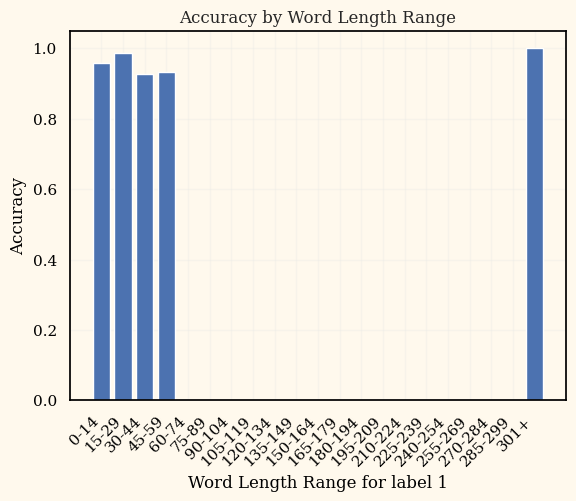

In [12]:
### 不同區間的準確度 Label1
# 將文本長度分為不同區間
df['length_range'] = pd.cut(df['refined_word_lengths'],
                            bins=[i*15 for i in range(21)] + [float('inf')],
                            labels=[f'{i*15}-{(i+1)*15-1}' for i in range(20)] + ['301+'], right=False)

# 計算每個區間的 accuracy
accuracy_by_range = []

for length_range, group in df[df['label']==1].groupby('length_range'):
    # 計算 accuracy
    accuracy = accuracy_score(group['label'], group['pred'])
    
    accuracy_by_range.append({'length_range': length_range, 'accuracy': accuracy})

# 將結果轉換成 DataFrame
result_df = pd.DataFrame(accuracy_by_range)

# 繪製圖表
plt.bar(result_df['length_range'], result_df['accuracy'])
plt.xlabel('Word Length Range for label 1')
plt.ylabel('Accuracy')
plt.title('Accuracy by Word Length Range')
plt.xticks(rotation=45, ha='right')  # 讓 x 軸標籤斜著顯示，避免重疊
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:148: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  self.im_ = ax.imshow(cm, **im_kw)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:148: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self.im_ = ax.imshow(cm, **im_kw)


ValueError: zero-size array to reduction operation maximum which has no identity

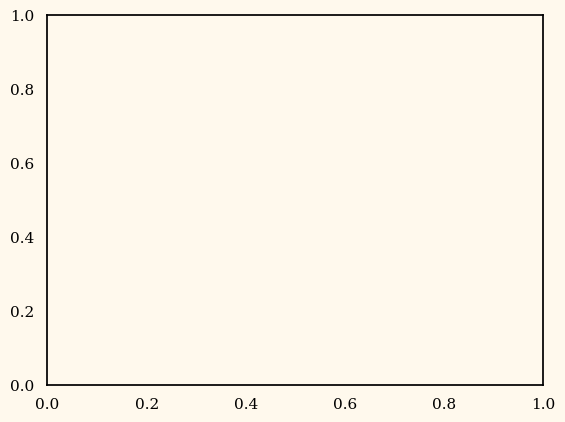

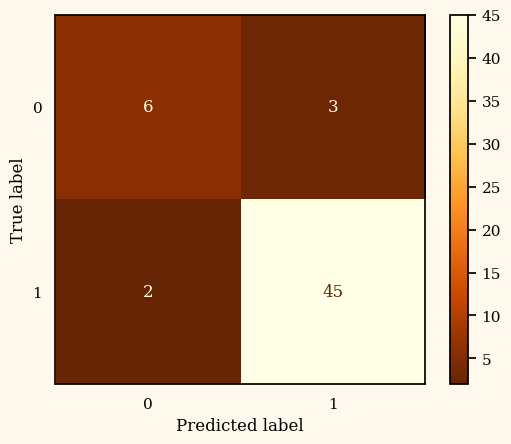

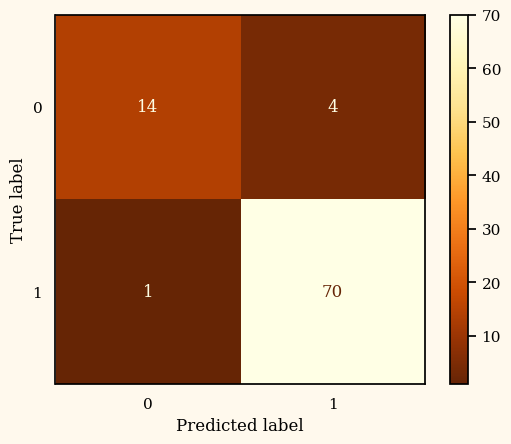

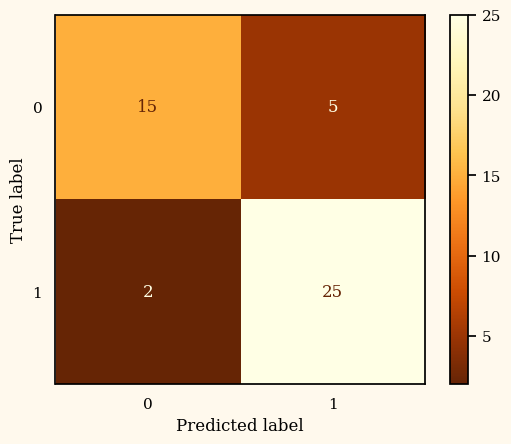

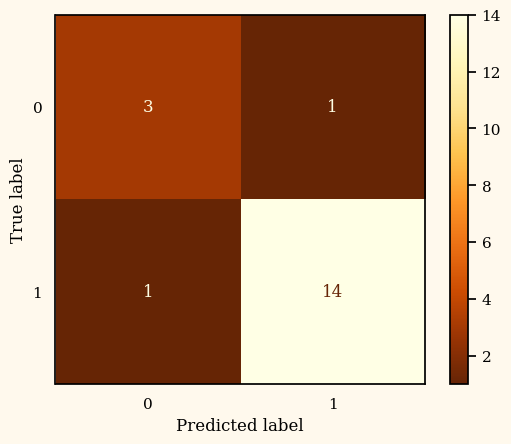

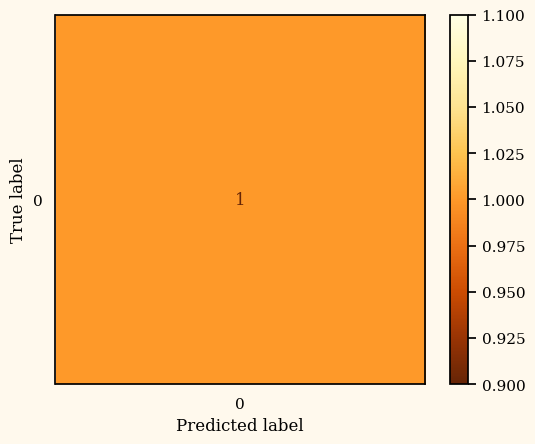

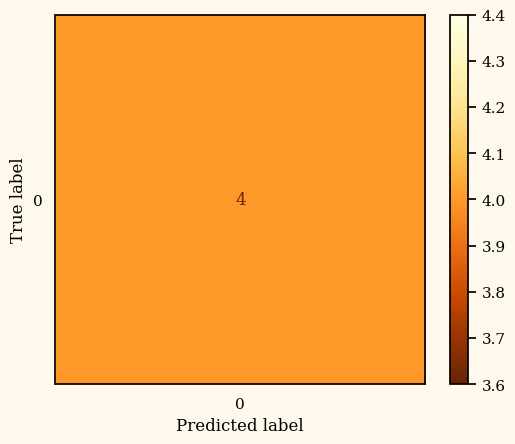

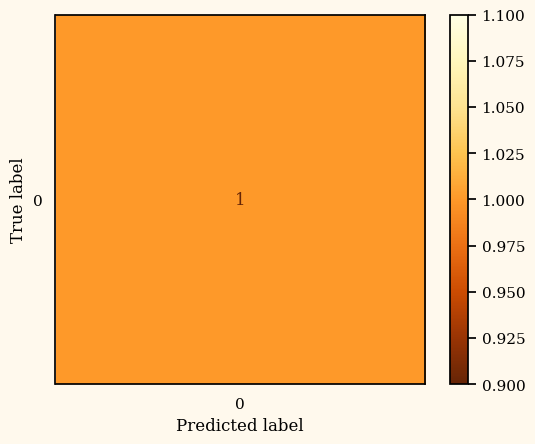

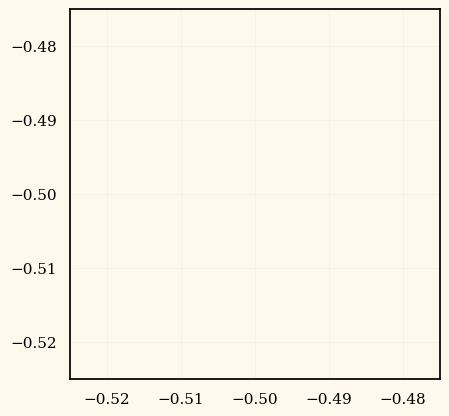

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
for length_range, group in df.groupby('length_range'):
    # 繪製Confusion Matrix
    cm = confusion_matrix(group['label'], group['pred'])
    plt.grid(False)
    cm_display = ConfusionMatrixDisplay(cm).plot(cmap='YlOrBr_r')
    #accuracy = accuracy_score(group['label'], group['pred'])

In [ ]:
for length_range, group in df.groupby('length_range'):
    print(group)

In [62]:
train_df = pd.read_csv('long_covid1003_unique_train.csv')

train_df['word_lengths'] = train_df['tweet'].apply(lambda x: len(x.split()))
# 將超過特定長度的視為一類
train_df['refined_word_lengths'] = train_df['word_lengths'].apply(lambda x: 257 if x > 256 else x)

train_df['length_range'] = pd.cut(train_df['refined_word_lengths'],
                            bins=[i*15 for i in range(21)] + [float('inf')],
                            labels=[f'{i*15}-{(i+1)*15-1}' for i in range(20)] + ['301+'], right=False)

# 按照Label和文本長度範圍計算計數
table = pd.crosstab(train_df['length_range'], train_df['label'], margins=True, margins_name='Total')

# 顯示表格
print(table)


label           0     1  Total
length_range                  
0-14           74   367    441
15-29         156   555    711
30-44         166   206    372
45-59          19   103    122
60-74           4     2      6
75-89          33     0     33
90-104          1     0      1
105-119         0     1      1
210-224         0     1      1
255-269         0   653    653
Total         453  1888   2341


In [86]:
df = pd.read_csv('long_covid1003_unique.csv', encoding= 'unicode_escape')

In [87]:
# 包含特定關鍵字的統計數量
keywords = ['chronic', 'long covid', 'long-covid', 'longcovid', 'long-term', 'persistent', 'after-effects', 'sequelae',
            'complications', 'recovery', 'post covid', 'post-covid', 'omicron', 'subvariant', 'reinfection', 'immune', 'variant']

for keyword in keywords:
    count = df[df['tweet'].str.contains(keyword, case=False)].shape[0]
    print(f"'{keyword}' appears in {count} articles")

'chronic' appears in 189 articles
'long covid' appears in 53 articles
'long-covid' appears in 0 articles
'longcovid' appears in 0 articles
'long-term' appears in 175 articles
'persistent' appears in 43 articles
'after-effects' appears in 6 articles
'sequelae' appears in 2 articles
'complications' appears in 201 articles
'recovery' appears in 400 articles
'post covid' appears in 33 articles
'post-covid' appears in 8 articles
'omicron' appears in 99 articles
'subvariant' appears in 0 articles
'reinfection' appears in 55 articles
'immune' appears in 1691 articles
'variant' appears in 291 articles


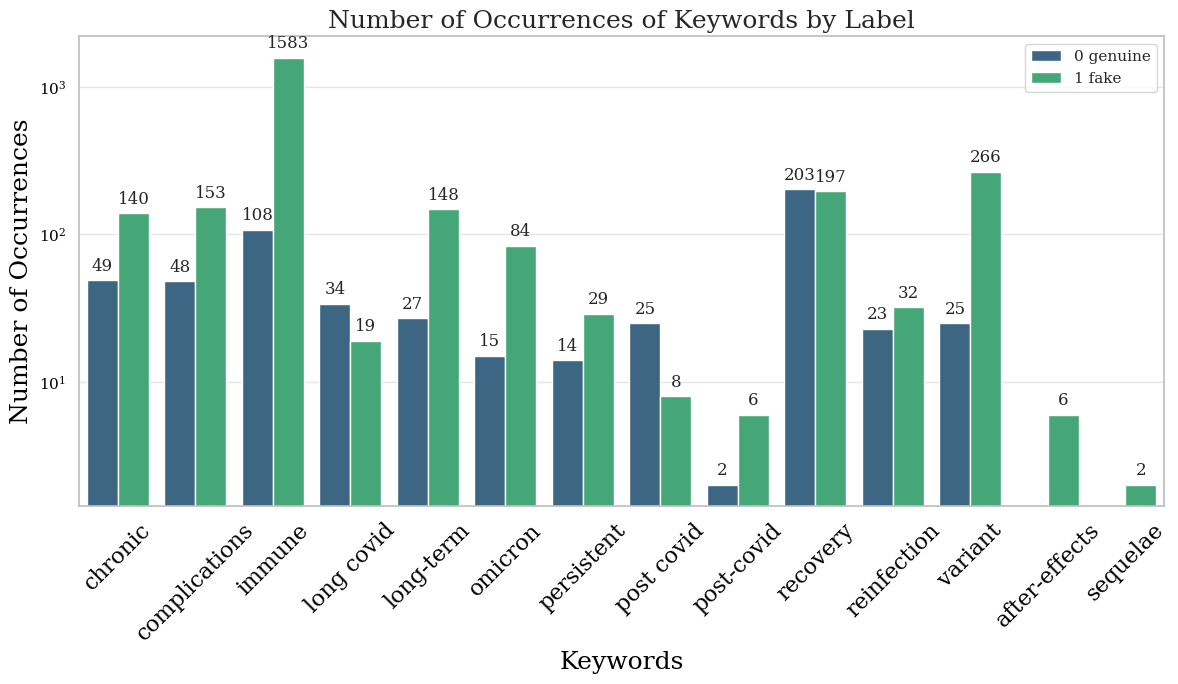

In [97]:
df['label'] = df['label'].replace({0: '0 genuine', 1: '1 fake'})

# 定義一個函數，該函數會返回是否含有某個 keyword
def contains_keyword(tweet, keyword):
    return keyword in tweet

# 對每個 keyword 生成一個新的列，該列會表示 tweet 是否包含該 keyword
for keyword in keywords:
    df[keyword] = df['tweet'].str.lower().apply(lambda x: contains_keyword(x, keyword))

# 對每個 keyword，計算與每個 label 的組合出現的次數
melted_df = df.melt(id_vars='label', value_vars=keywords)
grouped_counts = melted_df[melted_df['value'] == True].groupby(['label', 'variable']).size().reset_index(name='count')

# 使用 seaborn 的 barplot 方法來繪製分組柱狀圖
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='variable', y='count', hue='label', data=grouped_counts, palette='viridis')

# 在每個柱子上添加數字
for p in ax.patches:
    height = p.get_height()
    # 如果高度不是 NaN，則添加註釋
    if not pd.isna(height):
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# 設定標題和軸的名稱
plt.title('Number of Occurrences of Keywords by Label', fontsize=18)
plt.yscale('log') 
plt.xlabel('Keywords', fontsize=18)
plt.ylabel('Number of Occurrences', fontsize=18)
plt.xticks(rotation=45, fontsize=16)
plt.tight_layout()

# 設置左上角的 legend，將 0 改為 "genuine"，1 改為 "fake"
plt.legend(loc='upper right')

# 顯示圖形
# plt.show()
plt.savefig('keywords_by_label.png', dpi=300)

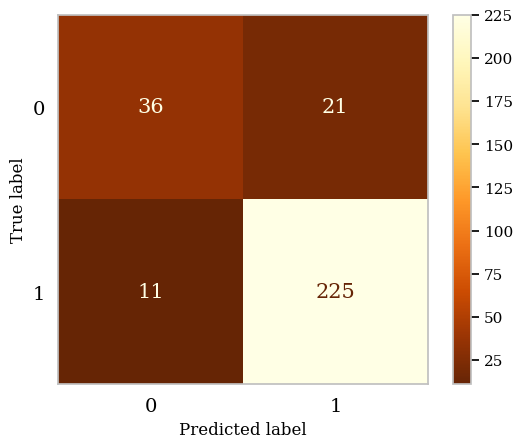

In [115]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#生成混淆矩陣數據
confusion_matrix_data = np.array([[36,21],[11,225]])

#每個數字對應的類別標
labels = [0,1]
#生成混淆矩陣
plt.rcParams['font.size']= 15
svm_cm = confusion_matrix_data
svm_disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm,display_labels=labels).plot(cmap='YlOrBr_r')
plt.grid(False)
plt.xticks(fontsize=14) #設定x 軸刻度字體大小
plt.yticks(fontsize=14) #設定 軸刻度字大小
plt.savefig('SVM.png', dpi=300)